In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mu_0 = 1.2566370614e-6

# Material Description

## EIT CELL 

The EIT cell is a quartz cell with Rb and Neon as buffer gas, surrounded by a heating system and a solenoid.
Everything is embedded in a custom made plastic cell holder, closed by two windows and weigthed down by a metal base with clamping rails.

<img src="Images/cell_real_1.jpg" alt="drawing" width="300"/>

<img src="Images/cell_real_2.jpg" alt="drawing" width="200"/>


### Cell

The cell is TT-Rb /Ne-10T-20x75-QW which means:
- Rb in natural abundance
- 10Torr of Neon as buffer gas
- 20x75mm
- Quartz

The windows are angled at 11°.

<img src="Images/Cell.png" alt="drawing" width="300"/>



### Cell Holder

The cell holder is custom made in the mechanical workshop.
It includes a metal tube cut in half to enclose the cell, with a small holle for the small "point" at half the length of the cell, and two closures pieces threaded to insert windows, in order to improve thermal isolation of the cell.

### Heating System 

It is THORLABS HT10K, a 1" x 3" flexible polyimide foil heating element with an integrated NTC thermistor for closed-loop temperature control.
The heating system has two directives in mind:
- **uniform heating**: temperature gradients cause accumulation of Rb in the colder spots, and it could stick to the cell walls forming a layer and invalidating everything else
- **slow heating/cooling**: High temperature gradients due to fast heating or cooling could break the quartz cell

<img src="Images/Heating_pads.png" alt="drawing" width="300"/>
 

#### Installation 

The heating foil is installed through a pressure-sensitive adhesive backing directly on the extremes of the cell itself.
The installation position has been decided in order to provide the most uniform possible heating to the cell.

The soldered wired ends are not electrically isolated, so they have been covered with thermal isolating tape  in order to avoid potential short circuits. The thermistor (central metallic small component) has also been similarly isolated, otherwise, if it short circuits it also does not work. 

The heating pad has then been covered by aluminum foil for thermal isolation and to help make the heating system more uniform across the whole cell. Notice that Aluminum is a good conductor, so the isolation of the heater contacts if fundamental.

The white wires are the thermistor wires: temperature is determined through a resistance measures between the thermirstor wires themselves. 
Since the wires are very small and fragile they have been soldered to thicker wires of green colour to make the design more robust. 
The wires have been connected to a BNC cable end for ease of measurement of the Resistance.
This procedure has been done for both heaters.

<img src="Images/BNC_end.png" alt="drawing" width="150"/>

The red wires are the heating wires. There is a resistance of around 19.5Ohms between them. They have been connected to banana cables to connect to a power supply for the heating. 

Each wire has been individually soldered in the end to make it thicker and has been connected to a banana cable. 

Notice that heating and thermistor cables have no polarity, so it does not matter which one is used for ground. 

When installing the heaters it is important to check that everything is working properly before continuing with the installation of the other components, so in this case it is important to measure that there is indeed a resistance of around 10kOhm at room temp between thermistor cables, and 19.5Ohms for heating cables, otherwise it means that there could be problems with the contacts that need to be adressed. 

 

#### Thermistor 

At room temperature the resistance is 10kOhms, and it decreases as temperature increases. 

$$ R_T[k\Omega] = 10*e^{\beta \left(\frac{1}{T[°C]+273}-\frac{1}{293}\right)} $$

with $\beta = 3750K$

#### Heating 

Series connection of the two heaters at the two ends of the cell is preferred:
- if one breaks it is immediately noticeable as current would drop to zero
- for a given resistance mismatch the power mismatch between the two heaters is cut in 4, leading to more uniform heating

$$ \Delta P_{series} = \frac{V^2}{(R_1+R_2)^2}\Delta R $$
$$ \Delta P_{parallel} = \frac{V^2}{R_1R_2}\Delta R $$

It is of paramount importance to heat and cool down the cell slowly, as high temperature gradients could risk breaking the cell itself.

Intuitevely, if environment and cell have a certain effective thermal conductivity $k_{th}$, the cell system has a heat capacity $C_{th}$, and I am dissipating a total power $P_R$ through the two heaters then:

$$ C_{th} \dot{T} = k_{th}(T_{env}-T)+ P_R $$

The solution for an initial temperture $T_0$ is:

$$ T(t) = T_0 e^{-\frac{k_{th}}{C_{th}}t} +\left( T_{env} + \frac{1}{k_{th}}P_R \right)\left( 1-e^{-\frac{k_{th}}{C_{th}}t} \right) $$

$$ \dot{T} = -\frac{k_{th}}{C_{th}} T_0 e^{-\frac{k_{th}}{C_{th}}t} + \frac{k_{th}}{C_{th}}\left( T_{env} + \frac{1}{k_{th}}P_R \right)e^{-\frac{k_{th}}{C_{th}}t} $$

In particular for breakage we are interested in the maximum derivative of temperature, which is obviously at time 0, and considering that at thermalization $k_{th}T_0 = k_{th}T_{env}+P_R$ :

$$ C_{th} \dot{T}_{max} = \Delta P_R $$

As expected it is important to keep the jumps in the power through the heaters not too big.So as I'm heating up I need to decrease the width of the jumps in voltage/current I make.

However, a simple heating/cooling procedure has been proven to work without breaking the cell:

1. Increase/Decrease current through resistors in series by 0.05A
2. Wait around 3min until thermalization (ie thermistor resistance is kind of stable)
3. Repeat
 


### Solenoid and mu-shield

The solenoid is simply composed of a Copper wire wound around the heating pads, where we can make current flow.
Externally we have put a kind of mu-shield to help suppressing stray magnetic fields.

The magnetic field for the idealized solenoid is given by:

$$ B = \mu_0 \frac{N}{L}I $$

with $N$ the number of coils, and $L$ the length of the cell, and $\mu_0 \approx 1.257 \cdot 10^{-6} N A^{-2}$ is the vacuum permeability.

Right now we have a 7.5cm cell and 40coils, so we have:

$$ B[G] \approx 6.702 \cdot I[A] $$

Theoretically, if I apply a field much larger than possible stray fields the mu-shield should not be critical (earth field is around 0.25 to 0.65 Gauss on the surface)

#### Installation 

Simply wind the copper cable around the aluminum foil, taking care not to break the cell. It is important to wound the wire tight around the cell, as the current cell holder is not very big compared to the cell size. To help with installation it is useful every few turns to block the wire from unwinding (it is kind of like a spring) with a piece of thermal tape. The external part of the copper wire does not conduct electricity due to oxidation, so it is ok to use bare wires for the solenoid.
Externally to the solenoid we have put a kind of mu-shield, even if it's really not one, but in principle it has high permeability so it should be ok.
In the literature it is more common from what I found to put it inside the solenoid, but as long as I manage to apply a strong magnetic field to degausse the mu-shield it should be ok.

#### De-Gaussing procedure

????


### Improvements 

- Connecting all heating small cables to a stable metallic structure, since they are small cables and potentially subjected to breakage 

- Closing with glue the holes from where the cables come out, in order to better thermally isolate the cell itself 

- Better characterization of heating/cooling of cell (computation of $C_{th},k_{th}$) and finding most efficient procedure to heat and cool the cell quickly

- implement a bigger solenoid and more stable, an idea could be:
    - put the cell with the heater, the Aluminum foil and the mu-shield inside a plastic holder
    - wrap the coils around this internal plastic holder, so that it is easier to construct (I am not wrapping hard metal coils around a quartz cell...) and the Rb is further away from the coils, where the magnetic field is more in the idealized regime

- put a true mu-shield

In [4]:
def get_T(R):
    " R is the resistance in kohms, T is the temperature in Celsius"
    beta = 3750
    T = 1/(np.log(R/10)/beta + 1/298)-273
    return T

def get_R(T):
    " R is the resistance in kohms, T is the temperature in Celsius"
    beta = 3750
    R = 10*np.exp(beta*(1/(T+273)-1/298))
    return R

def get_B(I, N=40,L=7.5):
    "I is the current in A, B is the magnetic field in Gauss, N is the number of turns, L is the length in cm"
    B = mu_0*N/(L/100)*I
    return B

### Heating Test

As we said the temperature should be linear in the power, so quadratic in the voltage.\
Here we took a small sample of data after waiting for thermalization at each value of the voltage.\
Indeed the parabolic fit is much better than the linear fit, as expected.

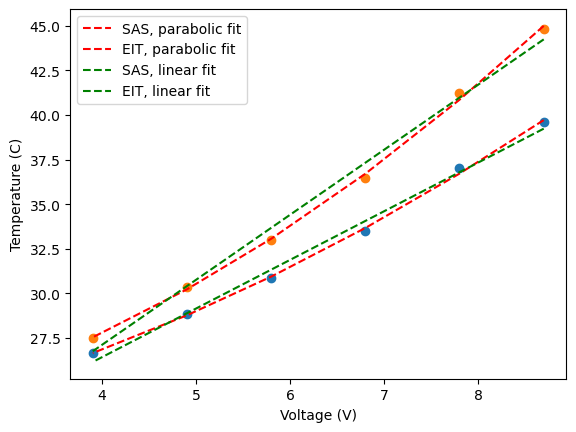

In [5]:
# test
x = np.array([8.7,7.8,6.8,5.8,4.9,3.9]) # values of the voltage
y1 = np.array([5.56,6.14,7.06,7.84,8.52,9.33]) # values of the resistance for SAS cell
y2 = np.array([4.56,5.22,6.28,7.20,8.01,9.00]) # values of the resistance for EIT cell

# plot the data
t1 = get_T(y1)
t2 = get_T(y2)
plt.scatter(x,t1)
plt.scatter(x,t2)

# parabolic fit
z = np.polyfit(x, t1, 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",label="SAS, parabolic fit")
z = np.polyfit(x, t2, 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",label="EIT, parabolic fit")

# linear fit
z = np.polyfit(x, t1, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--",label="SAS, linear fit")
z = np.polyfit(x, t2, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--",label="EIT, linear fit")

plt.xlabel('Voltage (V)')
plt.ylabel('Temperature (C)')
plt.legend()